Installing the Kaggle in My Enviornment

In [46]:
!pip install kaggle

Make a Directory for my Kaggle json file

In [47]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Kaggle API link

In [48]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
!ls # All files in my Directory

kaggle.json  sample_data  sentiment140.zip  training.1600000.processed.noemoticon.csv



sentiment140.zip is my zip file where all the tweets data is present.

In [50]:
# Unzip the file
from zipfile import ZipFile
sentiment_path="/content/sentiment140.zip"
with ZipFile(sentiment_path,'r') as zip:
  zip.extractall()
  print("The Sentiment File is unzip successfully!")

The Sentiment File is unzip successfully!


In [51]:
!ls

kaggle.json  sample_data  sentiment140.zip  training.1600000.processed.noemoticon.csv


training.1600000.processed.noemoticon.csv is my csv file that contains all the tweets data

Importing the Neccessary Dependencies

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']


In [54]:
data=pd.read_csv("/content/training.1600000.processed.noemoticon.csv",names=column_names,encoding='latin1')

In [55]:
data.head() # printing first five rows

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [56]:
data.isnull().sum() # checking the missing values in the dataset

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [57]:
data.shape

(1600000, 6)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [59]:
data['target'].value_counts() # checking the balance in the target column.

target
0    800000
4    800000
Name: count, dtype: int64

0 -> The tweet is negative.

4-> The tweet is positive.

In [60]:
new_data=data.sample(n=50000 , random_state=1) # taking the sample from a orignal data

In [61]:
new_data.head()

,target,ids,date,flag,user,text
514293,0,2190584004,Tue Jun 16 03:08:48 PDT 2009,NO_QUERY,Vicki_Gee,i miss nikki nu nu already shes always there ...
142282,0,1881451988,Fri May 22 04:42:15 PDT 2009,NO_QUERY,PatCashin,So I had a dream last night. I remember a sig...
403727,0,2058252964,Sat Jun 06 14:34:17 PDT 2009,NO_QUERY,deelectable,@girlyghost ohh poor sickly you (((hugs)) ho...
649503,0,2237307600,Fri Jun 19 05:34:22 PDT 2009,NO_QUERY,justinekepa,it is raining again
610789,0,2224301193,Thu Jun 18 09:20:06 PDT 2009,NO_QUERY,cmatt007,@MissKeriBaby wish I was in LA right now


In [62]:
new_data['target'].value_counts()

target
4    25095
0    24905
Name: count, dtype: int64

In [63]:
len(data) # length of original data

1600000

In [64]:
len(new_data) # length of sample data

50000

Now preprocess on the text

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [67]:
port_stem=PorterStemmer()

In [68]:
def stemming(content):
  new_content=re.sub('^[a zA Z]',' ',content)
  new_content=new_content.lower()
  new_content=new_content.split()
  new_content=[port_stem.stem(i) for i in new_content if not i in stopwords.words('english')]
  new_content=' '.join(new_content)
  return new_content

In [69]:
new_data['text']=new_data['text'].apply(stemming)

In [70]:
new_data.head()

,target,ids,date,flag,user,text
514293,0,2190584004,Tue Jun 16 03:08:48 PDT 2009,NO_QUERY,Vicki_Gee,miss nikki nu nu alreadi she alway need thank ...
142282,0,1881451988,Fri May 22 04:42:15 PDT 2009,NO_QUERY,PatCashin,dream last night. rememb sign clearli told get...
403727,0,2058252964,Sat Jun 06 14:34:17 PDT 2009,NO_QUERY,deelectable,@girlyghost ohh poor sickli (((hugs)) hope fee...
649503,0,2237307600,Fri Jun 19 05:34:22 PDT 2009,NO_QUERY,justinekepa,rain
610789,0,2224301193,Thu Jun 18 09:20:06 PDT 2009,NO_QUERY,cmatt007,@misskeribabi wish la right


In [71]:
x=new_data['text']      # separate the data and label.
y=new_data['target']

In [72]:
print(x)

514293     miss nikki nu nu alreadi she alway need thank ...
142282     dream last night. rememb sign clearli told get...
403727     @girlyghost ohh poor sickli (((hugs)) hope fee...
649503                                                  rain
610789                           @misskeribabi wish la right
                                 ...                        
1395069        @janet_08 obviously. ye i'm back hahaha! :-hh
270864                  @corrievogu ugh promis would let kno
1305111    @tracybegin may realist given dc' recent furni...
1390027                 decemb 13/14 - miley cyru come &lt;3
1595183    @djbewar ye inde play togeth juli beatpatrol f...
Name: text, Length: 50000, dtype: object


In [73]:
print(y)

514293     0
142282     0
403727     0
649503     0
610789     0
          ..
1395069    4
270864     0
1305111    4
1390027    4
1595183    4
Name: target, Length: 50000, dtype: int64


In [74]:
vectorizer=TfidfVectorizer(max_features=50000)
x=vectorizer.fit_transform(x) # convert text to numarical form

In [75]:
print(x)


  (0, 48925)	0.2864467175919993
  (0, 42934)	0.17660060073507264
  (0, 28642)	0.18211146750507837
  (0, 3753)	0.22436645764424662
  (0, 38132)	0.2899482228686327
  (0, 3697)	0.2344703767731922
  (0, 29720)	0.7030313165545976
  (0, 29181)	0.37465445849373036
  (0, 26526)	0.17201827528939487
  (1, 36577)	0.2335849478228205
  (1, 35068)	0.42141851068042213
  (1, 8370)	0.17244238301689396
  (1, 22377)	0.23425531389716028
  (1, 18950)	0.14079973180988622
  (1, 44087)	0.2641991426403024
  (1, 10206)	0.3535561682751759
  (1, 38683)	0.52780416938107
  (1, 35069)	0.2509895943828833
  (1, 29126)	0.1742295121162963
  (1, 23077)	0.18323260585485665
  (1, 14358)	0.25120059601183753
  (2, 39812)	0.23793328119830773
  (2, 5992)	0.22784867133172418
  (2, 24131)	0.239883885953267
  (2, 16943)	0.19400546867121132
  :	:
  (49997, 34605)	0.3833595674703063
  (49997, 34721)	0.3214588083787424
  (49997, 19189)	0.3200418049347029
  (49997, 12646)	0.31485479369538566
  (49997, 38416)	0.24374658323501056
  (49

Splitting the data into training and test data

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [77]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 50000) (40000, 50000) (10000, 50000)


In [78]:
print(y.shape,y_train.shape,y_test.shape)

(50000,) (40000,) (10000,)


Building a Model

In [79]:
model=LogisticRegression(max_iter=1000)

In [80]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [81]:
# Evaluation on training data
training_prediction=model.predict(x_train)
training_accuracy=accuracy_score(training_prediction,y_train)
print("The accuracy on training data is! ",training_accuracy)

The accuracy on training data is!  0.8391


In [82]:
# Evaluation on test data
test_prediction=model.predict(x_test)
test_accuracy=accuracy_score(test_prediction,y_test)
print("The accuracy on test data is! ",test_accuracy)

The accuracy on test data is!  0.7416


Classification Report

In [83]:
class_report=classification_report(y_test,test_prediction)
print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      4981
           4       0.73      0.78      0.75      5019

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



Confusion matrix

In [84]:
conf_matrix=confusion_matrix(y_test,test_prediction)

<Axes: >

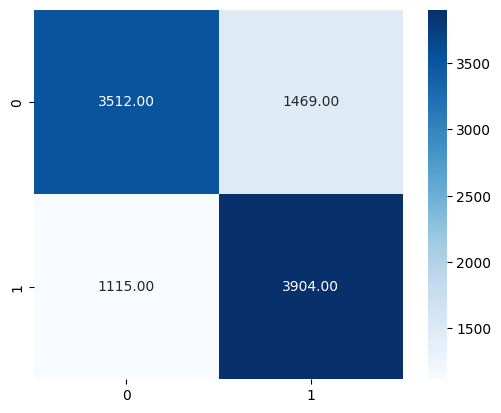

In [85]:
sns.heatmap(conf_matrix,cmap='Blues',annot=True,cbar=True,square=True,fmt='.2f')

Model Predicting

In [87]:
input=x_test[10]
y_test1=np.array(y_test)
model_prediction=model.predict(input)
print("The Actual label is! ",y_test1[10])
print("The model predicted label is! ",model_prediction)

if model_prediction==0:
  print("The sentiment of this tweet is negative")
else:
  print("The sentiment of this tweet is positive")

The Actual label is!  0
The model predicted label is!  [0]
The sentiment of this tweet is negative
